# **Anticipating Hospital Admissions from the Emergency Department**

# **Pre-processing and Training Data Development**


## **Summary:** ##

We provide a comparison of performance metrics for different classification models used on the same dataset. The models compared include Logistic Regression, XGBClassifier, RandomForestClassifier, Deep Neural Network (DNN), and an Ensemble Model (Voting Classifier) of all the previous models. The metrics compared are Accuracy, Precision, Recall, F1 Score, and AUC-ROC.

#### Key Observations:

1. **Accuracy**:
   - The Ensemble Model (Voting Classifier) has the highest accuracy at 0.8213.
   - The Deep Neural Network (DNN) closely follows with an accuracy of 0.8208.
   - Logistic Regression has the lowest accuracy at 0.8153.

2. **Precision**:
   - The DNN achieves the highest precision at 0.6923, indicating it is the best at correctly identifying positive instances among those predicted as positive.
   - The RandomForestClassifier has the lowest precision at 0.6627.
   
3. **Recall**:
   - The XGBClassifier has the highest recall at 0.4621, meaning it is the best at identifying all actual positive instances.
   - Logistic Regression has the lowest recall at 0.4269, indicating it misses more actual positive instances compared to other models.

4. **F1 Score**:
   - The XGBClassifier has the highest F1 Score at 0.5481, suggesting it has the best balance between precision and recall.
   - Logistic Regression has the lowest F1 Score at 0.5221.

5. **AUC-ROC**:
   - The Ensemble Model (Voting Classifier) has the highest AUC-ROC at 0.8543, indicating the best overall ability to distinguish between positive and negative classes.
   - Logistic Regression has the lowest AUC-ROC at 0.6812, indicating the poorest performance in distinguishing between classes.

### Conclusions:

- **Ensemble Model (Voting Classifier)**:
  - This model stands out with the highest AUC-ROC score (0.8543) and high accuracy (0.8213), making it the best overall performer in terms of distinguishing between classes and general prediction accuracy.

- **Deep Neural Network (DNN)**:
  - The DNN shows strong performance with the highest precision (0.6923) and near-top accuracy (0.8208), indicating it is very effective at correctly predicting positive instances among those it classifies as positive.

- **XGBClassifier**:
  - This model excels in recall (0.4621) and F1 Score (0.5481), making it particularly effective in identifying positive instances and balancing precision and recall.

- **Logistic Regression**:
  - While Logistic Regression has the lowest performance across most metrics, it still serves as a useful baseline model with reasonable accuracy (0.8153) and AUC-ROC (0.6812).

- **RandomForestClassifier**:
  - This model performs moderately well across all metrics but does not lead in any particular area. Its performance is solid but not exceptional compared to the other models.

Overall, the Ensemble Model (Voting Classifier) provides the best overall performance, making it the preferred choice if one aims to maximize both accuracy and the ability to distinguish between classes. The DNN and XGBClassifier also show strong individual performance in precision and recall, respectively, and could be considered depending on the specific needs of precision or recall in a given application.

## **Retriving the data**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataEDAed.csv")
df.head()

,Unnamed: 0,esi,age,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,...,previousdispo,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2_device,triage_vital_temp,n_edvisits,n_admissions,n_surgeries,age_bin
0,0,4.0,40.0,Hispanic or Latino,White or Caucasian,English,unknown,Single,Full Time,Other,...,No previous dispo,146.0,85.0,18.0,0.0,97.0,0,0,1.0,21-40
1,1,4.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,...,No previous dispo,125.0,77.0,16.0,0.0,98.0,0,0,2.0,61-80
2,2,2.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,...,Discharge,134.0,78.0,16.0,0.0,97.8,1,0,2.0,61-80
3,3,3.0,84.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,...,Discharge,133.0,72.0,18.0,0.0,98.4,1,0,5.0,81-150
4,4,3.0,86.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,...,Admit,143.0,87.0,18.0,0.0,98.5,0,0,10.0,81-150


In [5]:
df1 = df.drop(columns=["Unnamed: 0"])

It seems that having insurance or not is important so let's make a dummy variable. 

## **Encoding Categorical Variables**

In our EDA, we come up with the conclusion that age and even insurance status are important features that affect disposition. We get dummies variables to count age and insurance status into account in our modeling.  

In [10]:
df1['insurance_status'] = df['insurance_status'].astype('category')
df2 = pd.get_dummies(df1, columns=['insurance_status', 'age_bin'])
df2.head()

,esi,age,ethnicity,race,lang,religion,maritalstatus,employstatus,disposition,arrivalmode,...,insurance_status_Commercial,insurance_status_Medicaid,insurance_status_Medicare,insurance_status_Other,insurance_status_Self pay,age_bin_0-20,age_bin_21-40,age_bin_41-60,age_bin_61-80,age_bin_81-150
0,4.0,40.0,Hispanic or Latino,White or Caucasian,English,unknown,Single,Full Time,0,Walk-in,...,False,False,False,True,False,False,True,False,False,False
1,4.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,0,Car,...,True,False,False,False,False,False,False,False,True,False
2,2.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,0,Walk-in,...,True,False,False,False,False,False,False,False,True,False
3,3.0,84.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,1,Walk-in,...,False,False,True,False,False,False,False,False,False,True
4,3.0,86.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,0,Walk-in,...,False,False,True,False,False,False,False,False,False,True


In [12]:
# Convert only boolean columns to integers
boolean_columns = df2.select_dtypes(include=['bool']).columns
df2[boolean_columns] = df2[boolean_columns].astype(int)
df2.head()

,esi,age,ethnicity,race,lang,religion,maritalstatus,employstatus,disposition,arrivalmode,...,insurance_status_Commercial,insurance_status_Medicaid,insurance_status_Medicare,insurance_status_Other,insurance_status_Self pay,age_bin_0-20,age_bin_21-40,age_bin_41-60,age_bin_61-80,age_bin_81-150
0,4.0,40.0,Hispanic or Latino,White or Caucasian,English,unknown,Single,Full Time,0,Walk-in,...,0,0,0,1,0,0,1,0,0,0
1,4.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,0,Car,...,1,0,0,0,0,0,0,0,1,0
2,2.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,0,Walk-in,...,1,0,0,0,0,0,0,0,1,0
3,3.0,84.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,1,Walk-in,...,0,0,1,0,0,0,0,0,0,1
4,3.0,86.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,0,Walk-in,...,0,0,1,0,0,0,0,0,0,1


## **Feature Scaling and dimension reduction**

We scale the numerical feature to ensure that they are on the same scale. 

In [16]:
numeric_columns = df2.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['esi',
 'age',
 'disposition',
 'triage_vital_hr',
 'triage_vital_sbp',
 'triage_vital_dbp',
 'triage_vital_rr',
 'triage_vital_o2_device',
 'triage_vital_temp',
 'n_edvisits',
 'n_admissions',
 'n_surgeries',
 'insurance_status_Commercial',
 'insurance_status_Medicaid',
 'insurance_status_Medicare',
 'insurance_status_Other',
 'insurance_status_Self pay',
 'age_bin_0-20',
 'age_bin_21-40',
 'age_bin_41-60',
 'age_bin_61-80',
 'age_bin_81-150']

In [18]:
df_numeric = df2[numeric_columns]
df_numeric.head()

,esi,age,disposition,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2_device,triage_vital_temp,n_edvisits,...,insurance_status_Commercial,insurance_status_Medicaid,insurance_status_Medicare,insurance_status_Other,insurance_status_Self pay,age_bin_0-20,age_bin_21-40,age_bin_41-60,age_bin_61-80,age_bin_81-150
0,4.0,40.0,0,63.0,146.0,85.0,18.0,0.0,97.0,0,...,0,0,0,1,0,0,1,0,0,0
1,4.0,66.0,0,83.0,125.0,77.0,16.0,0.0,98.0,0,...,1,0,0,0,0,0,0,0,1,0
2,2.0,66.0,0,78.0,134.0,78.0,16.0,0.0,97.8,1,...,1,0,0,0,0,0,0,0,1,0
3,3.0,84.0,1,101.0,133.0,72.0,18.0,0.0,98.4,1,...,0,0,1,0,0,0,0,0,0,1
4,3.0,86.0,0,76.0,143.0,87.0,18.0,0.0,98.5,0,...,0,0,1,0,0,0,0,0,0,1


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric.drop(columns=['disposition']))




# Run PCA to capture 95% of the variance
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(df_scaled)


print(f'Number of components selected: {pca.n_components_}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Total variance explained: {sum(pca.explained_variance_ratio_)}')

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])


print(df_pca)

Number of components selected: 16
Explained variance ratio: [0.15987889 0.09171609 0.08760917 0.06867273 0.06638782 0.05839834
 0.05576166 0.05250126 0.05009772 0.04807196 0.04706557 0.04270797
 0.03892799 0.03556138 0.03318332 0.02876501]
Total variance explained: 0.9653068847121281
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -1.411755 -1.420842 -0.223929 -1.194521 -1.570451 -1.769583  2.344271   
1       1.099490 -1.916503 -0.283552  0.948727  0.472385 -1.232957 -1.186403   
2       1.713846 -1.558410 -0.154380  0.791702  0.973788 -1.181066 -0.972147   
3       3.331744 -0.300094 -1.791292 -1.379341 -0.709708  1.933635  0.982106   
4       4.133266 -0.379603 -1.243989 -1.448376 -1.202532  1.166965  0.624591   
...          ...       ...       ...       ...       ...       ...       ...   
361956  1.833310  0.540209 -0.706456  1.252907 -1.197037  0.122630  0.155089   
361957  1.746202  0.853684 -0.561864  1.087042 -0.634366  0.425312  0.25926

This shows that 16 PC vectors are capturing 95 percent of the variance. However, we don't use this fact as we need to know exactly what features are important, but PC vectors are a combination of features. 

## **Data Split**

In [23]:
drop_columns = ['age_bin_0-20','age_bin_21-40','age_bin_41-60','age_bin_61-80','age_bin_81-150']

df = pd.DataFrame(df_scaled, columns=df_numeric.drop(columns=['disposition']).columns)
dfd = df.drop(columns = drop_columns)
dfd.head()

,esi,age,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2_device,triage_vital_temp,n_edvisits,n_admissions,n_surgeries,insurance_status_Commercial,insurance_status_Medicaid,insurance_status_Medicare,insurance_status_Other,insurance_status_Self pay
0,1.119840,-0.345028,-1.367140,0.594485,0.326652,0.206239,-0.17804,-1.403443,-0.385534,-0.357366,-0.407608,-0.710381,-0.812848,-0.464320,3.250610,-0.054349
1,1.119840,1.010123,-0.156421,-0.395408,-0.253526,-0.841690,-0.17804,-0.115923,-0.385534,-0.357366,-0.012270,1.407695,-0.812848,-0.464320,-0.307635,-0.054349
2,-1.360618,1.010123,-0.459101,0.028832,-0.181004,-0.841690,-0.17804,-0.373427,-0.268293,-0.357366,-0.012270,1.407695,-0.812848,-0.464320,-0.307635,-0.054349
3,-0.120389,1.948305,0.933226,-0.018306,-0.616138,0.206239,-0.17804,0.399085,-0.268293,-0.357366,1.173743,-0.710381,-0.812848,2.153688,-0.307635,-0.054349
4,-0.120389,2.052547,-0.580173,0.453072,0.471697,0.206239,-0.17804,0.527837,-0.385534,-0.357366,3.150432,-0.710381,-0.812848,2.153688,-0.307635,-0.054349


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfd, df_numeric['disposition'], test_size=0.2, random_state=42)

## **Selecting important features**

We conducted a principal component analysis to identify the data responsible for 95 percent of the variance. Now we use XGBoost to find 10 features with the highest impact. 

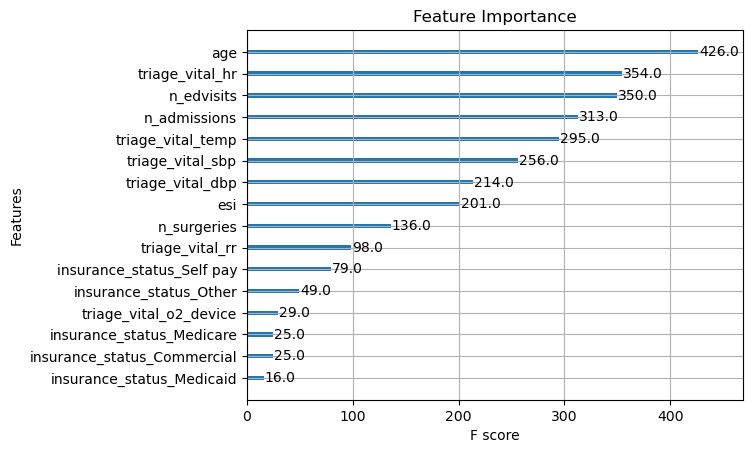

,0
esi,201.0
age,426.0
triage_vital_hr,354.0
triage_vital_sbp,256.0
triage_vital_dbp,214.0
triage_vital_rr,98.0
triage_vital_o2_device,29.0
triage_vital_temp,295.0
n_edvisits,350.0
n_admissions,313.0


In [30]:
import xgboost as xgb

feature_names = dfd.columns.tolist()

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)



xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Get feature importance
importance = model.get_booster().get_score()
for key, value in importance.items():
    importance[key]=[value]
pd.DataFrame(importance).transpose()


In [31]:
dfd.columns

Index(['esi', 'age', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp',
       'triage_vital_rr', 'triage_vital_o2_device', 'triage_vital_temp',
       'n_edvisits', 'n_admissions', 'n_surgeries',
       'insurance_status_Commercial', 'insurance_status_Medicaid',
       'insurance_status_Medicare', 'insurance_status_Other',
       'insurance_status_Self pay'],
      dtype='object')

In [34]:
important10 = dfd [['esi', 'age', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp',
       'triage_vital_rr', 'triage_vital_o2_device', 'triage_vital_temp',
       'n_edvisits', 'n_admissions']]
important10.head()

,esi,age,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2_device,triage_vital_temp,n_edvisits,n_admissions
0,1.119840,-0.345028,-1.367140,0.594485,0.326652,0.206239,-0.17804,-1.403443,-0.385534,-0.357366
1,1.119840,1.010123,-0.156421,-0.395408,-0.253526,-0.841690,-0.17804,-0.115923,-0.385534,-0.357366
2,-1.360618,1.010123,-0.459101,0.028832,-0.181004,-0.841690,-0.17804,-0.373427,-0.268293,-0.357366
3,-0.120389,1.948305,0.933226,-0.018306,-0.616138,0.206239,-0.17804,0.399085,-0.268293,-0.357366
4,-0.120389,2.052547,-0.580173,0.453072,0.471697,0.206239,-0.17804,0.527837,-0.385534,-0.357366


# **Training and modeling**

We first install tensorflow, and then use the train the follwoing models
- Logistic Regression
- XGBoost
- Random Forrest Classifier
- Deep Neural Network 

In [39]:
!pip install tensorflow

In [41]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = important10
y = df_numeric['disposition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Logistic Regression ---
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg )
recall_logreg = recall_score(y_test, y_pred_logreg )
f1_logreg = f1_score(y_test, y_pred_logreg )
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(" Logistic Regression Model Performance Summary:================================")
print(f"Logistic Regression Accuracy: {logreg_accuracy_logreg}")
print(f"Logistic Regression Precision: {precision_logreg}")
print(f"Logistic Regression Recall: {recall_logreg}")
print(f"Logistic Regression F1 Score: {f1_logreg}")
print(f"Logistic Regression AUC-ROC: {auc_logreg}")
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

# --- XGBoost Classifier ---
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb )
recall_xgb = recall_score(y_test, y_pred_xgb )
f1_xgb = f1_score(y_test, y_pred_xgb )
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBClassifier Model Performance Summary:================================")
print(f"XGBClassifier Accuracy: {accuracy_xgb}")
print(f"XGBClassifier Precision: {precision_xgb}")
print(f"XGBClassifier Recall: {recall_xgb}")
print(f"XGBClassifier F1 Score: {f1_xgb}")
print(f"XGBClassifier AUC-ROC: {auc_xgb}")
print("XGBClassifier Confusion Matrix:")
print(cm_xgb)

# ---Random Forrest Classifier ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf )
recall_rf = recall_score(y_test, y_pred_rf )
f1_rf = f1_score(y_test, y_pred_rf )
auc_rf = roc_auc_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(" RandomForestClassifier Model Performance Summary:================================")
print(f"RandomForestClassifier Accuracy: {accuracy_rf}")
print(f"RandomForestClassifier Precision: {precision_rf}")
print(f"RandomForestClassifier Recall: {recall_rf}")
print(f"RandomForestClassifier F1 Score: {f1_rf}")
print(f"RandomForestClassifier AUC-ROC: {auc_rf}")
print("RandomForestClassifier Confusion Matrix:")
print(cm_rf)

# --- Deep Neural Network (DNN) ---
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))  

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, epochs=2, batch_size=8)

y_pred_prob = dnn_model.predict(X_test).flatten()
y_pred_dnn = (y_pred_prob > 0.5).astype(int)

accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
precision_dnn = precision_score(y_test, y_pred_dnn )
recall_dnn = recall_score(y_test, y_pred_dnn )
f1_dnn = f1_score(y_test, y_pred_dnn )
auc_dnn = roc_auc_score(y_test, y_pred_dnn)
cm_dnn = confusion_matrix(y_test, y_pred_dnn)
print(" Logistic Regression Model Performance Summary:================================")
print(f"DNN Accuracy: {accuracy_dnn}")
print(f"DNN Precision: {precision_dnn}")
print(f"DNN Recall: {recall_dnn}")
print(f"DNN F1 Score: {f1_dnn}")
print(f"DNN AUC-ROC: {auc_dnn}")
print("Logistic Regression Confusion Matrix:")
print(cm_dnn)


2024-12-25 13:19:47.183604: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


 Logistic Regression Model Performance Summary:================================
Logistic Regression Accuracy: 0.811583992927493
Logistic Regression Precision: 0.6619007569386038
Logistic Regression Recall: 0.414089447529962
Logistic Regression F1 Score: 0.5094583902754801
Logistic Regression AUC-ROC: 0.6743251462798125
Logistic Regression Confusion Matrix:
[[51670  3618]
 [10022  7083]]
XGBClassifier Model Performance Summary:================================
XGBClassifier Accuracy: 0.8167226113021977
XGBClassifier Precision: 0.6668696181612594
XGBClassifier Recall: 0.4482315112540193
XGBClassifier F1 Score: 0.5361163554996154
XGBClassifier AUC-ROC: 0.6894789447458058
XGBClassifier Confusion Matrix:
[[51458  3830]
 [ 9438  7667]]
 RandomForestClassifier Model Performance Summary:================================
RandomForestClassifier Accuracy: 0.8115287389664747
RandomForestClassifier Precision: 0.6484770484770485
RandomForestClassifier Recall: 0.44185910552470037
RandomForestClassifier

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
36196/36196 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - accuracy: 0.8119 - loss: 0.3995
Epoch 2/2
36196/36196 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step - accuracy: 0.8165 - loss: 0.3909
2263/2263 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step
 Logistic Regression Model Performance Summary:================================
DNN Accuracy: 0.8175376072272181
DNN Precision: 0.7022845275181724
DNN Recall: 0.3953814674071909
DNN F1 Score: 0.5059285580699457
DNN AUC-ROC: 0.6717628650883445
Logistic Regression Confusion Matrix:
[[52421  2867]
 [10342  6763]]


In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin



# Define a custom wrapper for the Deep Neural Network to use in the ensemble
class DNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = Sequential()
        self.model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(1, activation='sigmoid'))  # Binary classification

    def fit(self, X, y):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=2, batch_size=8, verbose=0)

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()  # Predict class labels

    def predict_proba(self, X):
        # Return probabilities for the positive class (class 1)
        prob = self.model.predict(X)
        return np.concatenate([1 - prob, prob], axis=1)  # Probabilities for both classes



# Create the ensemble (Voting Classifier)
dnn_model = DNNWrapper()
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('xgb', xgb),
    ('dnn', dnn_model)
], voting='soft')

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Get predicted probabilities for AUC (soft voting combines probabilities)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
y_pred = voting_clf.predict(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"Ensemble Model (Voting Classifier) AUC: {auc_score}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Ensemble Model (Voting Classifier) Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Ensemble Model (Voting Classifier) Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"Ensemble Model (Voting Classifier) F1 Score: {f1}")

  

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2263/2263 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step
2263/2263 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step
Ensemble Model (Voting Classifier) AUC: 0.848513618317768
Ensemble Model (Voting Classifier) Precision: 0.6767233661593555
Ensemble Model (Voting Classifier) Recall: 0.441917567962584
Ensemble Model (Voting Classifier) F1 Score: 0.5346772767462422


In [47]:
accuracy_ens = accuracy_score(y_test, y_pred)
print(f"Ensemble Model (Voting Classifier) Accuracy: {accuracy_ens}")

Ensemble Model (Voting Classifier) Accuracy: 0.8182559087204564


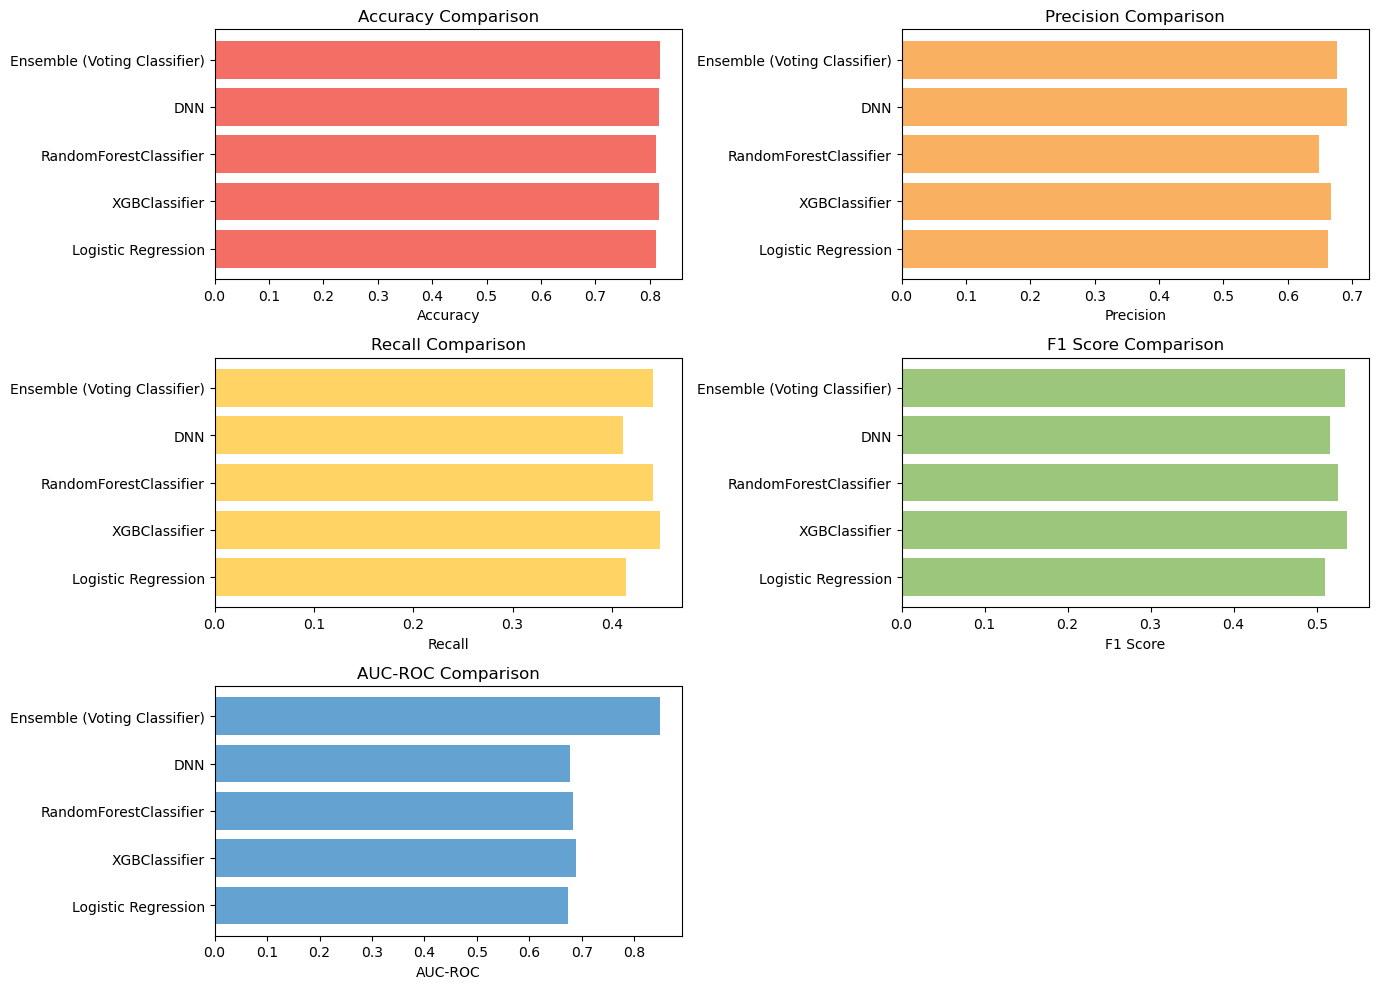

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.811584,0.661901,0.414089,0.509458,0.674325
1,XGBClassifier,0.816723,0.666870,0.448232,0.536116,0.689479
2,RandomForestClassifier,0.811529,0.648477,0.441859,0.525591,0.683878
3,DNN,0.817510,0.691445,0.411108,0.515637,0.677175
4,Ensemble (Voting Classifier),0.818256,0.676723,0.441918,0.534677,0.848514


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = {
    'Model': ['Logistic Regression', 'XGBClassifier', 'RandomForestClassifier', 'DNN', 'Ensemble (Voting Classifier)'],
    'Accuracy': [0.811583992927493, 0.8167226113021977, 0.8115287389664747, 0.817509980246709, 0.8182559087204564],
    'Precision': [0.6619007569386038, 0.6668696181612594, 0.6484770484770485, 0.6914454277286136, 0.6767233661593555],
    'Recall': [0.414089447529962, 0.4482315112540193, 0.44185910552470037, 0.41110786319789533,  0.441917567962584],
    'F1 Score': [0.5094583902754801, 0.5361163554996154, 0.5255910987482615, 0.5156370302474794, 0.5346772767462422],
    'AUC-ROC': [0.6743251462798125, 0.6894789447458058, 0.6838781130285924, 0.6771752599161232, 0.848513618317768]
}

# Create the DataFrame
df = pd.DataFrame(data)



# Set up the subplots, one for each metric
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# List of metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
colors = ['#EE3224', '#F78F1E', '#FFC222', '#72AF44', '#237BBF']

# Loop through the metrics and create individual bar plots
for i, metric in enumerate(metrics):
    axes[i].barh(df['Model'], df[metric], color=colors[i], alpha=0.7)
    axes[i].set_xlabel(metric)
    axes[i].set_title(f'{metric} Comparison')
    

# Adjust the layout and remove the empty subplot (last one)
fig.tight_layout()
fig.delaxes(axes[-1])

# Show the plot
plt.show()

df.head()

## **Using all features**

In [52]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = dfd
y = df_numeric['disposition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Logistic Regression ---
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg )
recall_logreg = recall_score(y_test, y_pred_logreg )
f1_logreg = f1_score(y_test, y_pred_logreg )
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(" Logistic Regression Model Performance Summary:================================")
print(f"Logistic Regression Accuracy: {logreg_accuracy_logreg}")
print(f"Logistic Regression Precision: {precision_logreg}")
print(f"Logistic Regression Recall: {recall_logreg}")
print(f"Logistic Regression F1 Score: {f1_logreg}")
print(f"Logistic Regression AUC-ROC: {auc_logreg}")
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

# --- XGBoost Classifier ---
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb )
recall_xgb = recall_score(y_test, y_pred_xgb )
f1_xgb = f1_score(y_test, y_pred_xgb )
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBClassifier Model Performance Summary:================================")
print(f"XGBClassifier Accuracy: {accuracy_xgb}")
print(f"XGBClassifier Precision: {precision_xgb}")
print(f"XGBClassifier Recall: {recall_xgb}")
print(f"XGBClassifier F1 Score: {f1_xgb}")
print(f"XGBClassifier AUC-ROC: {auc_xgb}")
print("XGBClassifier Confusion Matrix:")
print(cm_xgb)

# ---Random Forrest Classifier ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf )
recall_rf = recall_score(y_test, y_pred_rf )
f1_rf = f1_score(y_test, y_pred_rf )
auc_rf = roc_auc_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(" RandomForestClassifier Model Performance Summary:================================")
print(f"RandomForestClassifier Accuracy: {accuracy_rf}")
print(f"RandomForestClassifier Precision: {precision_rf}")
print(f"RandomForestClassifier Recall: {recall_rf}")
print(f"RandomForestClassifier F1 Score: {f1_rf}")
print(f"RandomForestClassifier AUC-ROC: {auc_rf}")
print("RandomForestClassifier Confusion Matrix:")
print(cm_rf)

# --- Deep Neural Network (DNN) ---
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))  

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, epochs=2, batch_size=8)

y_pred_prob = dnn_model.predict(X_test).flatten()
y_pred_dnn = (y_pred_prob > 0.5).astype(int)

accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
precision_dnn = precision_score(y_test, y_pred_dnn )
recall_dnn = recall_score(y_test, y_pred_dnn )
f1_dnn = f1_score(y_test, y_pred_dnn )
auc_dnn = roc_auc_score(y_test, y_pred_dnn)
cm_dnn = confusion_matrix(y_test, y_pred_dnn)
print(" Logistic Regression Model Performance Summary:================================")
print(f"DNN Accuracy: {accuracy_dnn}")
print(f"DNN Precision: {precision_dnn}")
print(f"DNN Recall: {recall_dnn}")
print(f"DNN F1 Score: {f1_dnn}")
print(f"DNN AUC-ROC: {auc_dnn}")
print("Logistic Regression Confusion Matrix:")
print(cm_dnn)


 Logistic Regression Model Performance Summary:================================
Logistic Regression Accuracy: 0.8153412622767394
Logistic Regression Precision: 0.6719425784485138
Logistic Regression Recall: 0.4268927214264835
Logistic Regression F1 Score: 0.5220935220935221
Logistic Regression AUC-ROC: 0.681206091577082
Logistic Regression Confusion Matrix:
[[51723  3565]
 [ 9803  7302]]
XGBClassifier Model Performance Summary:================================
XGBClassifier Accuracy: 0.8199411545315155
XGBClassifier Precision: 0.6733685466007838
XGBClassifier Recall: 0.46208710903244665
XGBClassifier F1 Score: 0.5480705890510695
XGBClassifier AUC-ROC: 0.6963705694199999
XGBClassifier Confusion Matrix:
[[51454  3834]
 [ 9201  7904]]
 RandomForestClassifier Model Performance Summary:================================
RandomForestClassifier Accuracy: 0.8160319367894686
RandomForestClassifier Precision: 0.6626857977489475
RandomForestClassifier Recall: 0.45092078339666763
RandomForestClassifi

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36196/36196 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - accuracy: 0.8117 - loss: 0.3971
Epoch 2/2
36196/36196 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - accuracy: 0.8173 - loss: 0.3887
2263/2263 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step
 Logistic Regression Model Performance Summary:================================
DNN Accuracy: 0.8207975909272996
DNN Precision: 0.6922933730454207
DNN Recall: 0.4348436129786612
DNN F1 Score: 0.5341663973571762
DNN AUC-ROC: 0.6875238177756857
Logistic Regression Confusion Matrix:
[[51982  3306]
 [ 9667  7438]]


In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin



# Define a custom wrapper for the Deep Neural Network to use in the ensemble
class DNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = Sequential()
        self.model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(1, activation='sigmoid'))  # Binary classification

    def fit(self, X, y):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=2, batch_size=8, verbose=0)

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()  # Predict class labels

    def predict_proba(self, X):
        # Return probabilities for the positive class (class 1)
        prob = self.model.predict(X)
        return np.concatenate([1 - prob, prob], axis=1)  # Probabilities for both classes



# Create the ensemble (Voting Classifier)
dnn_model = DNNWrapper()
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('xgb', xgb),
    ('dnn', dnn_model)
], voting='soft')

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Get predicted probabilities for AUC (soft voting combines probabilities)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
y_pred = voting_clf.predict(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"Ensemble Model (Voting Classifier) AUC: {auc_score}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Ensemble Model (Voting Classifier) Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Ensemble Model (Voting Classifier) Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"Ensemble Model (Voting Classifier) F1 Score: {f1}")

  

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2263/2263 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step
2263/2263 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step
Ensemble Model (Voting Classifier) AUC: 0.854314632177071
Ensemble Model (Voting Classifier) Precision: 0.684447983014862
Ensemble Model (Voting Classifier) Recall: 0.45232388190587547
Ensemble Model (Voting Classifier) F1 Score: 0.5446865429969376


In [56]:
accuracy_ens = accuracy_score(y_test, y_pred)
print(f"Ensemble Model (Voting Classifier) Accuracy: {accuracy_ens}")

Ensemble Model (Voting Classifier) Accuracy: 0.8213225035569738


In [60]:
data = {
    'Model': ['Logistic Regression', 'XGBClassifier', 'RandomForestClassifier', 'DNN', 'Ensemble Model (Voting Classifier)'],
    'Accuracy': [0.8153412622767394, 0.8199411545315155, 0.8160319367894686, 0.8207975909272996, 0.8213225035569738],
    'Precision': [0.6719425784485138, 0.6733685466007838, 0.6626857977489475, 0.6922933730454207, 0.684447983014862],
    'Recall': [0.4268927214264835, 0.46208710903244665, 0.45092078339666763, 0.4348436129786612, 0.45232388190587547],
    'F1 Score': [0.5220935220935221, 0.5480705890510695, 0.5366685221263569, 0.5341663973571762, 0.5446865429969376],
    'AUC-ROC': [0.681206091577082, 0.6963705694199999, 0.6899553996566611, 0.6875238177756857, 0.854314632177071]
}

# Create the DataFrame
df = pd.DataFrame(data)

df


,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.815341,0.671943,0.426893,0.522094,0.681206
1,XGBClassifier,0.819941,0.673369,0.462087,0.548071,0.696371
2,RandomForestClassifier,0.816032,0.662686,0.450921,0.536669,0.689955
3,DNN,0.820798,0.692293,0.434844,0.534166,0.687524
4,Ensemble Model (Voting Classifier),0.821323,0.684448,0.452324,0.544687,0.854315


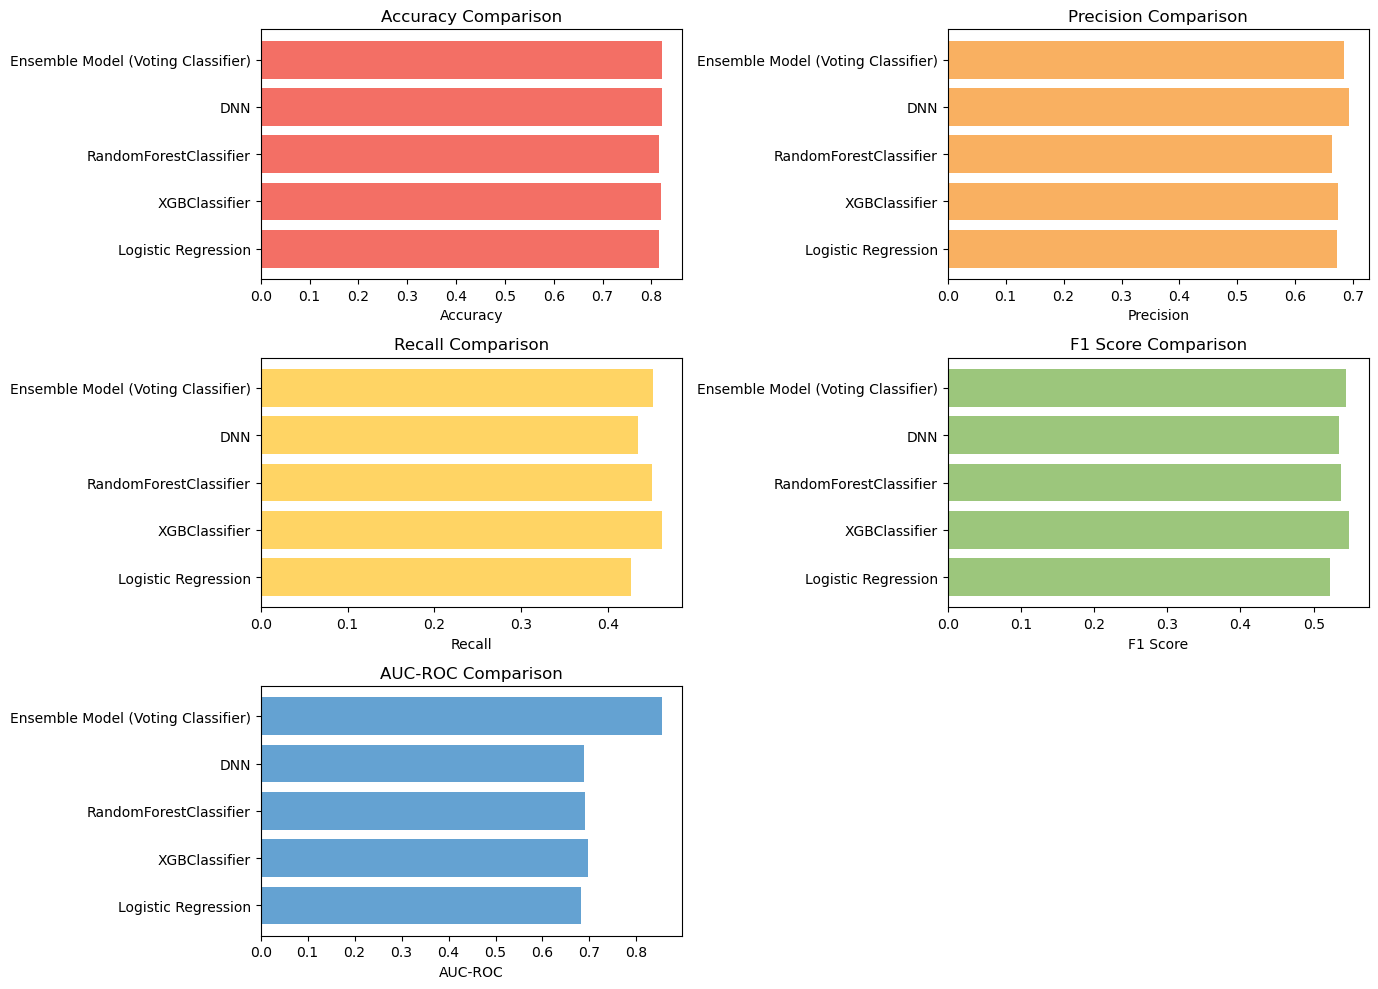

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.815341,0.671943,0.426893,0.522094,0.681206
1,XGBClassifier,0.819941,0.673369,0.462087,0.548071,0.696371
2,RandomForestClassifier,0.816032,0.662686,0.450921,0.536669,0.689955
3,DNN,0.820798,0.692293,0.434844,0.534166,0.687524
4,Ensemble Model (Voting Classifier),0.821323,0.684448,0.452324,0.544687,0.854315


In [62]:

# Set up the subplots, one for each metric
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# List of metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
colors = ['#EE3224', '#F78F1E', '#FFC222', '#72AF44', '#237BBF']

# Loop through the metrics and create individual bar plots
for i, metric in enumerate(metrics):
    axes[i].barh(df['Model'], df[metric], color=colors[i], alpha=0.7)
    axes[i].set_xlabel(metric)
    axes[i].set_title(f'{metric} Comparison')
    

# Adjust the layout and remove the empty subplot (last one)
fig.tight_layout()
fig.delaxes(axes[-1])

# Show the plot
plt.show()

df.head()